In [1]:
#Task Performed :

#1. Sentiment Analysis of review: I have used unsupervised ML technique(using dictionary of negative and positive words)
         #since our dataset has not labeled column
    
#2. User similarity based on the their review similarity score: used two different ways 
                          # 1. vectorizing using Doc2vec model from gensim module and then finding cosine similarity
                          # 2. vectorizing using counntvectorizer and then cosine similarity
        
#3. clustering the text review using KMeans  into the 5 different clusters based on their semantic simialrity.
         # Then finding the top words from each clusters
    
# 4. Finding the top frequency of ngrams (combination of words) tokens.

#5. Build a machine translation model using seq2seq (encoder decoder) technique.
    # since our dataset has both the english and their similar meaning text in indonesian language
    # so i used the this dataset to build a neural translation model.
        
#6. Textual analytics concepts like tokenization ,lemmitization, cleaning, vectorization, probability distribution ,NLP modules         

#7. Built a   next word prediction model using markov chain concept and n-grams. 

#NOTE:
## Please note that I have used minimum no. of data to reduce the training time because of my poor system compatibilty.
  # so, training data and epochs can be tuned high for higher accuracy anytime.


In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk
import string
from nltk.corpus import stopwords
stop1 = stopwords.words('english')
punctu=string.punctuation
from nltk.util import ngrams
from nltk.probability import FreqDist

In [3]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk import word_tokenize

C:\Users\user\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
import re
from numpy import array, argmax, random, take
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

Using TensorFlow backend.
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\AppData\Roaming

In [5]:
# Reading dataset
data=pd.read_csv("assignment.csv",index_col="unique_id")

In [6]:
data.head()

,raw_text,review_text
unique_id,,
0,Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!,Menginspirasi secara spiritual dan mental! Buku yang memungkinkan Anda mempertanyakan moral Anda dan akan membantu Anda menemukan siapa diri Anda sebenarnya!
1,This is one my must have books,Ini adalah salah satu yang harus saya miliki buku
2,It is a masterpiece of spirituality,Itu adalah mahakarya spiritualitas
3,"I'll be the first to admit, its literary quality isn't much","Saya akan menjadi yang pertama mengakui, kualitas sastranya tidak banyak"
4,"It is rather simplistically written, but the message behind it is so powerful that you have to read it","Ini ditulis agak sederhana, tetapi pesan di baliknya sangat kuat sehingga Anda harus membacanya"


In [7]:
data.isna().any()


raw_text       False
review_text     True
dtype: bool

In [8]:
# function to remove stopwords
def stop1(text):
    
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(text) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    snt=' '.join(filtered_sentence)
    return(snt)

In [9]:
data=data.dropna()
data2=data.copy()    

In [10]:
# making list of pairs of english and indonesian sentence
eng_indo=[]
eng=data['raw_text']

indo=data['review_text']
for a,b in zip(eng,indo):
    eng_indo.append([a,b])
    

In [11]:
eng[1]

'This is one my must have books'

In [12]:
eng_indo[1]


['This is one my must have books',
 'Ini adalah salah satu yang harus saya miliki buku']

In [13]:
# word net lemmatizer for lemmatizing the words
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

In [14]:
# tokenizing 
# removing stopswords and pucntuations 
import re
def tokenz(strr):
    word_tokens=[]
    for i in data[strr]:
        i=i.lower()
        i = re.sub("n't", "not", i)
        i = re.sub("'s", "", i)
        i = re.sub("'ll", "", i)
        wt=[lemma.lemmatize(w) for w in (nltk.word_tokenize(i))]
        wt=[w for w in wt if w not in string.punctuation and w not in stopwords.words('english') ]
        word_tokens.append(wt)
    return(word_tokens)

#tokens=[w for w in word_tokens if w not in string.punctuation and w not in stopwords.words('english') ]

In [15]:
#rvw_tokens=tokenz('review_text')

In [16]:
word_tokens=tokenz('raw_text')

In [17]:
all_tokens=[]
for w in word_tokens:
    all_tokens.extend(w)
tokens=[w.lower() for w in all_tokens if w not in punctu]

In [18]:
# top 10 best bigrams frequency from english text review
from nltk.collocations import BigramCollocationFinder
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_tokens)
finder.nbest(bigram_measures.pmi, 10)

[("'95", 'f150'),
 ("'current", 'qualifier'),
 ("'desert", 'self-sufficiency'),
 ("'king", "kings'-"),
 ("'nnn", "'nmm"),
 ("'paper", "'words"),
 ("'words", 'e-wish'),
 ('********2012', 'update*****well'),
 ('***so', 'prechill'),
 ('**completely', 'organic**smells')]

In [19]:
# word frequency distribution
fd=nltk.FreqDist(all_tokens)

In [20]:
fd.most_common(10)

[('wa', 6332),
 ('one', 4226),
 ('book', 3178),
 ('like', 2892),
 ('great', 2601),
 ('time', 2423),
 ('would', 2348),
 ('ha', 2338),
 ('``', 2248),
 ('good', 2242)]

In [21]:
df=pd.DataFrame()

In [22]:
df=data

In [23]:
df.head(5)

,raw_text,review_text
unique_id,,
0,Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!,Menginspirasi secara spiritual dan mental! Buku yang memungkinkan Anda mempertanyakan moral Anda dan akan membantu Anda menemukan siapa diri Anda sebenarnya!
1,This is one my must have books,Ini adalah salah satu yang harus saya miliki buku
2,It is a masterpiece of spirituality,Itu adalah mahakarya spiritualitas
3,"I'll be the first to admit, its literary quality isn't much","Saya akan menjadi yang pertama mengakui, kualitas sastranya tidak banyak"
4,"It is rather simplistically written, but the message behind it is so powerful that you have to read it","Ini ditulis agak sederhana, tetapi pesan di baliknya sangat kuat sehingga Anda harus membacanya"


In [24]:
feedback=df

In [25]:
# importing the data dictionary 
positive_diction=pd.read_csv('positive.csv')
negative_diction=pd.read_csv('negative_diction.csv',encoding = "ISO-8859-1")
#positive_diction.head()


In [26]:
# the function to return the sentiment scores
def return_pos_score(statement):
    tokens=word_tokenize(statement) # tokenizing the words
    pos_score=0
    neg_score=0
    for i,j in enumerate(tokens):
        
        if lemma.lemmatize(j.lower()) in positive_diction: # checing in positive dictionary
            if i!=0:
                # If the previous word is negative then exclude the positive word after it
                if lemma.lemmatize(tokens[i-1].lower()) in negative_diction: 
                    #print((tokens[i-1],j))
                    pass
                
                else:
                    pos_score=pos_score+1
            else:
                pos_score=pos_score+1
                    

        if lemma.lemmatize(j.lower()) in negative_diction: # getting the negative score
            neg_score=neg_score+1
    if pos_score==0:
        pass
    else:
        
        pos_score=pos_score/(len(tokens))
    if neg_score==0:
        neg_score=0
    else:    
        neg_score=neg_score/(len(tokens))
    sentiment=''
    # if positive score is greater than the negative score, assign positive else negative sentiment
    if pos_score>=neg_score:
        sentiment='Positive'
    else:
        sentiment='Negative'
    com_score=pos_score+neg_score
    return([pos_score,neg_score,com_score,sentiment])

In [27]:
data2['raw_text'][1]

'This is one my must have books'

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = data2["raw_text"].apply(lambda x: sid.polarity_scores(x))

df = pd.concat([df.drop(['sentiments'], axis=1),df['sentiments'].apply(pd.Series)], axis=1)

dt=df['compound'].apply(lambda x: 'Positive' if x>=0.000 else 'Negative')
df['sentiment']=dt
df

,raw_text,review_text,neg,neu,pos,compound,sentiment
unique_id,,,,,,,
0,Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!,Menginspirasi secara spiritual dan mental! Buku yang memungkinkan Anda mempertanyakan moral Anda dan akan membantu Anda menemukan siapa diri Anda sebenarnya!,0.000,0.757,0.243,0.7256,Positive
1,This is one my must have books,Ini adalah salah satu yang harus saya miliki buku,0.000,1.000,0.000,0.0000,Positive
2,It is a masterpiece of spirituality,Itu adalah mahakarya spiritualitas,0.000,0.494,0.506,0.6249,Positive
3,"I'll be the first to admit, its literary quality isn't much","Saya akan menjadi yang pertama mengakui, kualitas sastranya tidak banyak",0.000,0.847,0.153,0.2023,Positive
4,"It is rather simplistically written, but the message behind it is so powerful that you have to read it","Ini ditulis agak sederhana, tetapi pesan di baliknya sangat kuat sehingga Anda harus membacanya",0.000,0.785,0.215,0.7118,Positive
...,...,...,...,...,...,...,...
64048,"Dropped calls, poor reception, wouldn't hold a charge","Panggilan terputus, penerimaan yang buruk, tidak akan dikenakan biaya",0.341,0.659,0.000,-0.4767,Negative
64049,This phone changed my opinion completely,Ponsel ini mengubah pendapat saya sepenuhnya,0.000,1.000,0.000,0.0000,Positive
64050,"It does everything I need and then some, and the camera/video is a bonus","Itu melakukan semua yang saya butuhkan dan beberapa, dan kamera / video adalah bonus",0.000,0.759,0.241,0.5423,Positive


In [29]:
df

,raw_text,review_text,neg,neu,pos,compound,sentiment
unique_id,,,,,,,
0,Spiritually and mentally inspiring! A book that allows you to question your morals and will help you discover who you really are!,Menginspirasi secara spiritual dan mental! Buku yang memungkinkan Anda mempertanyakan moral Anda dan akan membantu Anda menemukan siapa diri Anda sebenarnya!,0.000,0.757,0.243,0.7256,Positive
1,This is one my must have books,Ini adalah salah satu yang harus saya miliki buku,0.000,1.000,0.000,0.0000,Positive
2,It is a masterpiece of spirituality,Itu adalah mahakarya spiritualitas,0.000,0.494,0.506,0.6249,Positive
3,"I'll be the first to admit, its literary quality isn't much","Saya akan menjadi yang pertama mengakui, kualitas sastranya tidak banyak",0.000,0.847,0.153,0.2023,Positive
4,"It is rather simplistically written, but the message behind it is so powerful that you have to read it","Ini ditulis agak sederhana, tetapi pesan di baliknya sangat kuat sehingga Anda harus membacanya",0.000,0.785,0.215,0.7118,Positive
...,...,...,...,...,...,...,...
64048,"Dropped calls, poor reception, wouldn't hold a charge","Panggilan terputus, penerimaan yang buruk, tidak akan dikenakan biaya",0.341,0.659,0.000,-0.4767,Negative
64049,This phone changed my opinion completely,Ponsel ini mengubah pendapat saya sepenuhnya,0.000,1.000,0.000,0.0000,Positive
64050,"It does everything I need and then some, and the camera/video is a bonus","Itu melakukan semua yang saya butuhkan dan beberapa, dan kamera / video adalah bonus",0.000,0.759,0.241,0.5423,Positive


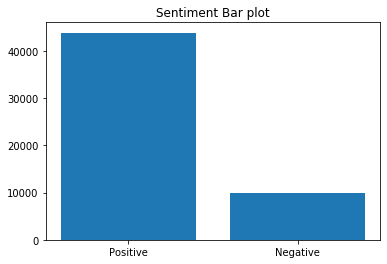

In [30]:
# plotting bar plot of sentiments
import matplotlib.pyplot as plt
%matplotlib inline
sent=df['sentiment'].value_counts().reset_index()
plt.bar(sent['index'],sent['sentiment'])
plt.title('Sentiment Bar plot')
plt.show()

In [31]:
e=(df['sentiment']).count()
print("Total Feedback: ",e)

arr=df['sentiment'].values.flatten()
n=0
for x in arr:
    if x=="Positive":
        n+=1
print("No. Of Positive Feedback: ",n)
  
    
nc=0
for x in arr:
    if x=="Negative":
        nc+=1
print("No. Of Negative Feedback: ",nc)

Total Feedback:  53682
No. Of Positive Feedback:  43817
No. Of Negative Feedback:  9865


In [32]:
class TaggedDocumentIterator(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield TaggedDocument(words=doc.split(), tags=[self.labels_list[idx]])
docLabels = list(data.index)
dt = list(data2['raw_text'])
sentences = TaggedDocumentIterator(dt, docLabels)
model = Doc2Vec(size=100, window=10, min_count=5, workers=11,alpha=0.025, iter=20)
model.build_vocab(sentences)
model.train(sentences,total_examples=model.corpus_count, epochs=model.iter)

C:\Users\user\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:362: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
C:\Users\user\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  del sys.path[0]


In [33]:
def default_clean(text):
    '''
    Removes default bad characters
    '''
    if not (pd.isnull(text)):
        # text = filter(lambda x: x in string.printable, text)
        bad_chars = set(["@", "+", '/', "'", '"', '\\','(',')', '', '\\n', '', '?', '#', ',','.', '[',']', '%', '$', '&', ';', '!', ';', ':',"*", "_", "=", "}", "{"])
        for char in bad_chars:
            text = text.replace(char, " ")
        text = re.sub('\d+', "", text)
    return text

In [34]:
def cosine_distance_countvectorizer_method(s1, s2):
    allsentences = [s1 , s2]
    
    # packages
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.spatial import distance
    
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')
    return (round((1-cosine)*100,2))

In [392]:
data['raw_text'][10]

"I first read THE PROPHET in college back in the 60's"

In [36]:
data3=data2[:100]

user_similarity_score_mat = [[0 for x in range(100)] for y in range(100)]   

In [37]:

c=-1
k=-1
for i in data3['raw_text']:
    c=c+1
    for j in data3['raw_text']:
        k=k+1
        cd=cosine_distance_countvectorizer_method(i,j)
        user_similarity_score_mat[c][k]=cd
    k=-1    
    

Similarity of two sentences are equal to  100.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  5.6 %
Similarity of two sentences are equal to  17.87 %
Similarity of two sentences are equal to  37.9 %
Similarity of two sentences are equal to  37.52 %
Similarity of two sentences are equal to  45.79 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  4.96 %
Similarity of two sentences are equal to  14.38 %
Similarity of two sentences are equal to  16.41 %
Similarity of two sentences are equal to  14.04 %
Similarity of two sentences are equal to  44.83 %
Similarity of two sentences are equal to  12.38 %
Similarity of two sentences are equal to  16.08 %
Similarity of two sentences are equal to  14.89 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  15.84 %
Similarity of two sentences are equal to  4.15 %
Similarity of

Similarity of two sentences are equal to  28.64 %
Similarity of two sentences are equal to  51.64 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  28.28 %
Similarity of two sentences are equal to  15.81 %
Similarity of two sentences are equal to  33.71 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.85 %
Similarity of two sentences are equal to  20.0 %
Similarity of two sentences are equal to  36.51 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  24.1 %
Similarity of two sentences are equal to  14.91 %
Similarity of two sentences are equal to  14.91 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  22.36 %
Similarity of two sentences are equal to  10.26 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of tw

Similarity of two sentences are equal to  20.41 %
Similarity of two sentences are equal to  28.01 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  22.08 %
Similarity of two sentences are equal to  24.34 %
Similarity of two sentences are equal to  15.43 %
Similarity of two sentences are equal to  10.86 %
Similarity of two sentences are equal to  18.67 %
Similarity of two sentences are equal to  24.08 %
Similarity of two sentences are equal to  28.72 %
Similarity of two sentences are equal to  28.01 %
Similarity of two sentences are equal to  10.29 %
Similarity of two sentences are equal to  15.4 %
Similarity of two sentences are equal to  18.87 %
Similarity of two sentences are equal to  28.11 %
Similarity of two sentences are equal to  24.06 %
Similarity of two sentences are equal to  30.43 %
Similarity of two sentences are equal to  24.98 %
Similarity of two sentences are equal to  22.22 %
Similarity of two sentences are equal to  0.0 %
Simil

Similarity of two sentences are equal to  13.87 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  20.41 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  15.31 %
Similarity of two sentences are equal to  4.35 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  7.0 %
Similarity of two sentences are equal to  19.36 %
Similarity of two sentences are equal to  11.79 %
Similarity of two sentences are equal to  28.87 %
Similarity of two sentences are equal to  5.18 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  14.43 %
Similarity of two sentences are equal to  13.25 %
Similarity of two sentences are equal to  11.11 %
Similarity of two sentences are equal to  9.62 %
Similarity of two s

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  16.9 %
Similarity of two sentences are equal to  23.62 %
Similarity of two sentences are equal to  44.32 %
Similarity of two sentences are equal to  30.86 %
Similarity of two sentences are equal to  12.96 %
Similarity of two sentences are equal to  11.95 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  6.68 %
Similarity of two sentences are equal to  19.2 %
Similarity of two sentences are equal to  17.82 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.26 %
Similarity of two sentences are equal to  20.57 %
Similarity of two sentences are equal to  8.91 %
Similarity of two sentences are equal to  0.0 %
Similarity of two se

Similarity of two sentences are equal to  20.7 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  27.52 %
Similarity of two sentences are equal to  11.55 %
Similarity of two sentences are equal to  8.27 %
Similarity of two sentences are equal to  14.91 %
Similarity of two sentences are equal to  18.26 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  9.13 %
Similarity of two sentences are equal to  11.68 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  6.26 %
Similarity of two sentences are equal to  11.55 %
Similarity of two sentences are equal to  21.08 %
Similarity of two sentences are equal to  6.45 %
Similarity of two sentences are equal to  9.27 %
Similarity of two sentences are equal to  8.61 %
Similarity of two sentences are equal to  8.61 %
Similarity of two sentences are equal to  0.0 %
Similarity of two 

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  14.04 %
Similarity of two sentences are equal to  7.14 %
Similarity of two sentences are equal to  8.45 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  14.55 %
Similarity of two sentences are equal to  7.72 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  18.64 %
Similarity of two sentences are equal to  5.05 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  14.64 %
Similarity of two sentences are equal to  26.73 %
Similarity of two sentences are equal to  100.0 %
Similarity of two sentences are equal to  14.04 %
Similarity of two sentences are equal to  12.6 %
Similarity of two sentences are equal to  16.37 %
Similarity of two sentences are equal to  15.15 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  24.17 %
Similarity of t

Similarity of two sentences are equal to  16.61 %
Similarity of two sentences are equal to  8.3 %
Similarity of two sentences are equal to  12.38 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  16.44 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  17.21 %
Similarity of two sentences are equal to  11.79 %
Similarity of two sentences are equal to  12.6 %
Similarity of two sentences are equal to  18.57 %
Similarity of two sentences are equal to  100.0 %
Similarity of two sentences are equal to  9.62 %
Similarity of two sentences are equal to  8.91 %
Similarity of two sentences are equal to  23.57 %
Similarity of two sen

Similarity of two sentences are equal to  28.49 %
Similarity of two sentences are equal to  11.95 %
Similarity of two sentences are equal to  8.56 %
Similarity of two sentences are equal to  30.86 %
Similarity of two sentences are equal to  37.8 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  8.45 %
Similarity of two sentences are equal to  18.9 %
Similarity of two sentences are equal to  20.15 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.96 %
Similarity of two sentences are equal to  11.95 %
Similarity of two sentences are equal to  38.19 %
Similarity of two sentences are equal to  6.68 %
Similarity of two sentences are equal to  19.2 %
Similarity of two sentences are equal to  8.91 %
Similarity of two sentences are equal to  8.91 %
Similarity of two sentences are equal to  13.36 %
Similarity of two sentences are equal to  26.73 %
Similarity of two sentences are equal to  12.26 %
Similarity o

Similarity of two sentences are equal to  8.06 %
Similarity of two sentences are equal to  28.6 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  36.93 %
Similarity of two sentences are equal to  17.41 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  21.03 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  27.52 %
Similarity of two sentences are equal to  15.08 %
Similarity of two sentences are equal to  24.17 %
Similarity of two sentences are equal to  19.8 %
Similarity of two sentences are equal to  28.43 %
Similarity of two sentences are equal to  12.31 %
Similarity of two sentences are equal to  28.49 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  100.0 %
Similarity of two sentences are equal to  9.53 %
Similarity of two sentences are equal to  13.66 %
Similarity of 

Similarity of two sentences are equal to  15.19 %
Similarity of two sentences are equal to  25.48 %
Similarity of two sentences are equal to  38.62 %
Similarity of two sentences are equal to  18.49 %
Similarity of two sentences are equal to  15.53 %
Similarity of two sentences are equal to  28.64 %
Similarity of two sentences are equal to  19.61 %
Similarity of two sentences are equal to  16.01 %
Similarity of two sentences are equal to  37.39 %
Similarity of two sentences are equal to  32.03 %
Similarity of two sentences are equal to  32.03 %
Similarity of two sentences are equal to  8.01 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  22.04 %
Similarity of two sentences are equal to  12.33 %
Similarity of two sentences are equal to  16.01 %
Similarity of two sentences are equal to  9.25 %
Similarity of two sentences are equal to  20.97 %
Similarity of two sentences are equal to  35.95 %
Similarity of two sentences are equal to  0.0 %
Simila

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  100.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal 

Similarity of two sentences are equal to  25.26 %
Similarity of two sentences are equal to  20.41 %
Similarity of two sentences are equal to  4.72 %
Similarity of two sentences are equal to  11.18 %
Similarity of two sentences are equal to  18.75 %
Similarity of two sentences are equal to  10.02 %
Similarity of two sentences are equal to  18.75 %
Similarity of two sentences are equal to  17.15 %
Similarity of two sentences are equal to  15.31 %
Similarity of two sentences are equal to  20.28 %
Similarity of two sentences are equal to  19.57 %
Similarity of two sentences are equal to  23.62 %
Similarity of two sentences are equal to  9.97 %
Similarity of two sentences are equal to  12.86 %
Similarity of two sentences are equal to  18.43 %
Similarity of two sentences are equal to  18.84 %
Similarity of two sentences are equal to  17.15 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  14.14 %
Similarity of two sentences are equal to  3.47 %
Simil

Similarity of two sentences are equal to  19.25 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  13.25 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.6 %
Similarity of two sentences are equal to  23.57 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  20.41 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  13.25 %
Similarity of two sentences are equal to  9.13 %
Similarity of two sentences 

Similarity of two sentences are equal to  28.58 %
Similarity of two sentences are equal to  16.77 %
Similarity of two sentences are equal to  14.14 %
Similarity of two sentences are equal to  18.14 %
Similarity of two sentences are equal to  6.45 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  17.54 %
Similarity of two sentences are equal to  17.32 %
Similarity of two sentences are equal to  14.3 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  8.45 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.4 %
Similarity of two sentences are equal to  5.42 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  7.07 %
Similarity of two sentences are equal to  7.07 %
Similarity of two sentences are equal to  24.81 %
Similarity of two sentences are equal to  16.61 %
Similarity of two sentences are equal to  3.54 %
Similarity of tw

Similarity of two sentences are equal to  17.28 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  5.18 %
Similarity of two sentences are equal to  38.39 %
Similarity of two sentences are equal to  19.2 %
Similarity of two sentences are equal to  19.2 %
Similarity of two sentences are equal to  9.27 %
Similarity of two sentences are equal to  31.75 %
Similarity of two sentences are equal to  13.58 %
Similarity of two sentences are equal to  33.35 %
Similarity of two sentences are equal to  17.96 %
Similarity of two sentences are equal to  25.92 %
Similarity of two sentences are equal to  19.2 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  22.98 %
Similarity of two sentences are equal to  8.03 %
Similarity of two sentences are equal to  37.39 %
Similarity of two sentences are equal to  10.37 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of 

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  7.65 %
Similarity of two sentences are equal to  6.42 %
Similarity of two sentences are equal to  11.11 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  14.55 %
Similarity of two sentences are equal to  20.41 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  8.91 %
Similarity of two sentences are equal to  10.54 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.6 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  8.08 %
Similarity of two sentences are equal to  28.87 %
Similarity of two sentences are equal to  7.65 %
Similarity of two sentences are equal to  21.08 %
Similarity of two sentences are equal to  8.91 %
Similarity of two sentences are equal to  21.49 %
Similarity of two s

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  15.81 %
Similarity of two sentences are equal to  35.36 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  17.68 %
Similarity of two sentences are equal to  12.13 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  11.47 %
Similarity of two sentences are equal to  15.81 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  4.03 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.43 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.5 %
Similarity of two sente

Similarity of two sentences are equal to  5.34 %
Similarity of two sentences are equal to  13.61 %
Similarity of two sentences are equal to  3.7 %
Similarity of two sentences are equal to  3.64 %
Similarity of two sentences are equal to  8.83 %
Similarity of two sentences are equal to  15.1 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  2.97 %
Similarity of two sentences are equal to  7.27 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.68 %
Similarity of two sentences are equal to  10.91 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.91 %
Similarity of two sentences are equal to  18.57 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two senten

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  18.26 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.72 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equa

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  20.41 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  14.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  28.87 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  23.57 %
Similarity of two sentences are e

Similarity of two sentences are equal to  29.02 %
Similarity of two sentences are equal to  10.0 %
Similarity of two sentences are equal to  8.45 %
Similarity of two sentences are equal to  5.1 %
Similarity of two sentences are equal to  7.67 %
Similarity of two sentences are equal to  6.59 %
Similarity of two sentences are equal to  13.48 %
Similarity of two sentences are equal to  15.34 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  18.97 %
Similarity of two sentences are equal to  6.2 %
Similarity of two sentences are equal to  5.77 %
Similarity of two sentences are equal to  23.72 %
Similarity of two sentences are equal to  20.0 %
Similarity of two sentences are equal to  5.13 %
Similarity of two sentences are equal to  27.39 %
Similarity of two sentences are equal to  10.0 %
Similarity of two sentences are equal to  12.4 %
Similarity of two sentences are equal to  8.16 %
Similarity of two sentences are equal to  6.74 %
Similarity of two

Similarity of two sentences are equal to  15.15 %
Similarity of two sentences are equal to  16.75 %
Similarity of two sentences are equal to  32.08 %
Similarity of two sentences are equal to  7.88 %
Similarity of two sentences are equal to  16.12 %
Similarity of two sentences are equal to  32.08 %
Similarity of two sentences are equal to  5.05 %
Similarity of two sentences are equal to  15.12 %
Similarity of two sentences are equal to  14.82 %
Similarity of two sentences are equal to  13.8 %
Similarity of two sentences are equal to  28.35 %
Similarity of two sentences are equal to  23.9 %
Similarity of two sentences are equal to  15.33 %
Similarity of two sentences are equal to  21.82 %
Similarity of two sentences are equal to  5.98 %
Similarity of two sentences are equal to  18.53 %
Similarity of two sentences are equal to  19.52 %
Similarity of two sentences are equal to  4.03 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  7.14 %
Similarit

Similarity of two sentences are equal to  25.72 %
Similarity of two sentences are equal to  9.34 %
Similarity of two sentences are equal to  9.17 %
Similarity of two sentences are equal to  27.82 %
Similarity of two sentences are equal to  19.03 %
Similarity of two sentences are equal to  14.0 %
Similarity of two sentences are equal to  11.23 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  13.45 %
Similarity of two sentences are equal to  22.92 %
Similarity of two sentences are equal to  20.68 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  6.73 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  16.27 %
Similarity of two sentences are equal to  10.72 %
Similarity of two sentences are equal to  21.82 %
Similarity of two sentences are equal to  25.82 %
Similarity of two sentences are equal to  0.0 %
Similarity of 

Similarity of two sentences are equal to  28.59 %
Similarity of two sentences are equal to  12.68 %
Similarity of two sentences are equal to  8.45 %
Similarity of two sentences are equal to  24.49 %
Similarity of two sentences are equal to  25.16 %
Similarity of two sentences are equal to  23.9 %
Similarity of two sentences are equal to  26.42 %
Similarity of two sentences are equal to  21.08 %
Similarity of two sentences are equal to  18.26 %
Similarity of two sentences are equal to  25.35 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  33.71 %
Similarity of two sentences are equal to  7.07 %
Similarity of two sentences are equal to  20.25 %
Similarity of two sentences are equal to  27.39 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.0 %
Similarity of two sentences are equal to  19.57 %
Similarity of two sentences are equal to  33.37 %
Similarity

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.48 %
Similarity of two sentences are equal to  17.09 %
Similarity of two sentences are equal to  18.27 %
Similarity of two sentences are equal to  28.43 %
Similarity of two sentences are equal to  26.86 %
Similarity of two sentences are equal to  13.96 %
Similarity of two sentences are equal to  15.08 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  24.05 %
Similarity of two sentences are equal to  7.21 %
Similarity of two sentences are equal to  10.32 %
Similarity of two sentences are equal to  4.65 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  2.55 %
Similarity of two sentences are equal to  9.97 %
Similarity of two sentences are equal to  9.72 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  13.68 %
Similarity of t

Similarity of two sentences are equal to  13.99 %
Similarity of two sentences are equal to  20.03 %
Similarity of two sentences are equal to  12.04 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  13.19 %
Similarity of two sentences are equal to  18.43 %
Similarity of two sentences are equal to  22.0 %
Similarity of two sentences are equal to  12.04 %
Similarity of two sentences are equal to  5.06 %
Similarity of two sentences are equal to  13.99 %
Similarity of two sentences are equal to  4.26 %
Similarity of two sentences are equal to  15.64 %
Similarity of two sentences are equal to  18.73 %
Similarity of two sentences are equal to  13.9 %
Similarity of two sentences are equal to  13.9 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.43 %
Similarity of two sentences are equal to  14.35 %
Similarity of two sentences are equal to  8.03 %
Similarity o

Similarity of two sentences are equal to  24.25 %
Similarity of two sentences are equal to  16.17 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  27.82 %
Similarity of two sentences are equal to  14.0 %
Similarity of two sentences are equal to  16.17 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  21.17 %
Similarity of two sentences are equal to  24.75 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  15.34 %
Similarity of two sentences are equal to  8.57 %
Similarity of two sentences are equal to  32.08 %
Similarity of two sentences are equal to  8.57 %
Similarity of two sentences are equal to  17.65 %
Similarity of two sentences are equal to  21.0 %
Similarity of two sentences are equal to  44.51 %
Similarity of two sentences are equal to  23.01 %
Similarity of 

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  21.38 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  8.53 %
Similarity of two sentences are equal to  8.94 %
Similarity of two sentences are equal to  28.82 %
Similarity of two sentences are equal to  11.55 %
Similarity of two sentences are equal to  14.14 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.65 %
Similarity of two sentences are equal to  14.14 %
Similarity of two sentences are equal to  12.06 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  14.55 %
Similarity of two sentences are equal to  17.89 %
Similarity of two sentences are equal to  16.33 %
Similarity of two sentences are equal to  15.0 %
Similarity of two sentences are equal to  17.96 %
Similarity of two sentences are equal to  13.33 %
Similarity of

Similarity of two sentences are equal to  10.54 %
Similarity of two sentences are equal to  8.86 %
Similarity of two sentences are equal to  28.58 %
Similarity of two sentences are equal to  29.81 %
Similarity of two sentences are equal to  22.82 %
Similarity of two sentences are equal to  19.67 %
Similarity of two sentences are equal to  24.34 %
Similarity of two sentences are equal to  12.17 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  29.32 %
Similarity of two sentences are equal to  10.54 %
Similarity of two sentences are equal to  30.43 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  11.95 %
Similarity of two sentences are equal to  18.63 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  43.92 %
Similarity of two sentences are equal to  5.77 %
Similarity of two sentences are equal to  0.0 %
Similarity o

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  21.76 %
Similarity of two sentences are equal to  5.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  7.67 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  13.48 %
Similarity of two sentences are equal to  15.34 %
Similarity of two sentences are equal to  8.45 %
Similarity of two sentences are equal to  6.32 %
Similarity of two sentences are equal to  6.2 %
Similarity of two sentences are equal to  28.87 %
Similarity of two sentences are equal to  15.81 %
Similarity of two sentences are equal to  100.0 %
Similarity of two sentences are equal to  15.39 %
Similarity of two sentences are equal to  9.13 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.4 %
Similarity of two sentences are equal to  8.16 %
Similarity of two se

Similarity of two sentences are equal to  9.37 %
Similarity of two sentences are equal to  100.0 %
Similarity of two sentences are equal to  9.13 %
Similarity of two sentences are equal to  5.66 %
Similarity of two sentences are equal to  14.91 %
Similarity of two sentences are equal to  6.15 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.91 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  16.01 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  16.67 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  9.13 %
Similarity of two sentences are equal to  8.01 %
Similarity of two sentences are equal to  10.72 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  8.7 %
Similarity of two sentences are equal to  8.01 %
Similarity of two sentences are equal to  10.21 %
Similarity of two s

Similarity of two sentences are equal to  5.44 %
Similarity of two sentences are equal to  9.51 %
Similarity of two sentences are equal to  22.65 %
Similarity of two sentences are equal to  24.81 %
Similarity of two sentences are equal to  18.61 %
Similarity of two sentences are equal to  16.32 %
Similarity of two sentences are equal to  10.93 %
Similarity of two sentences are equal to  18.61 %
Similarity of two sentences are equal to  17.74 %
Similarity of two sentences are equal to  10.88 %
Similarity of two sentences are equal to  20.8 %
Similarity of two sentences are equal to  15.1 %
Similarity of two sentences are equal to  22.24 %
Similarity of two sentences are equal to  18.0 %
Similarity of two sentences are equal to  26.92 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  21.18 %
Similarity of two sentences are equal to  7.41 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  21.76 %
Similarity

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  9.49 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.72 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  15.43 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equ

Similarity of two sentences are equal to  7.55 %
Similarity of two sentences are equal to  13.61 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  7.45 %
Similarity of two sentences are equal to  12.5 %
Similarity of two sentences are equal to  24.87 %
Similarity of two sentences are equal to  13.61 %
Similarity of two sentences are equal to  5.72 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  4.81 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.7 %
Similarity of two sentences are equal to  7.86 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  11.79 %
Similarity of two sentences are equal to  5.41 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two senten

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  23.92 %
Similarity of two sentences are equal to  12.96 %
Similarity of two sentences are equal to  12.96 %
Similarity of two sentences are equal to  6.26 %
Similarity of two sentences are equal to  17.15 %
Similarity of two sentences are equal to  9.17 %
Similarity of two sentences are equal to  13.51 %
Similarity of two sentences are equal to  8.08 %
Similarity of two sentences are equal to  14.0 %
Similarity of two sentences are equal to  6.48 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  15.51 %
Similarity of two sentences are equal to  5.42 %
Similarity of two sentences are equal to  19.42 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two se

Similarity of two sentences are equal to  8.01 %
Similarity of two sentences are equal to  38.73 %
Similarity of two sentences are equal to  12.91 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  23.9 %
Similarity of two sentences are equal to  14.14 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  18.26 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  25.35 %
Similarity of two sentences are equal to  16.9 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  5.59 %
Similarity of two sentences are equal to  11.95 %
Similarity of two sentences are equal to  5.87 %
Similarity of two sentences are equal to  10.54 %
Similarity of two sentences are equal to  9.13 %
Similarity of two sentences are equal to  8.45 %
Similarity of two s

Similarity of two sentences are equal to  26.21 %
Similarity of two sentences are equal to  25.75 %
Similarity of two sentences are equal to  18.49 %
Similarity of two sentences are equal to  16.01 %
Similarity of two sentences are equal to  29.65 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  41.39 %
Similarity of two sentences are equal to  6.2 %
Similarity of two sentences are equal to  13.32 %
Similarity of two sentences are equal to  32.03 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  8.77 %
Similarity of two sentences are equal to  14.71 %
Similarity of two sentences are equal to  25.09 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  13.45 %
Similarity of two sentences are equal to  24.81 %
Similarity of two sentences are equal to  33.97 %
Similarity of two sentences are equal to  13.87 %
Similarity 

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  25.16 %
Similarity of two sentences are equal to  40.52 %
Similarity of two sentences are equal to  36.51 %
Similarity of two sentences are equal to  7.67 %
Similarity of two sentences are equal to  3.54 %
Similarity of two sentences are equal to  3.23 %
Similarity of two sentences are equal to  3.95 %
Similarity of two sentences are equal to  31.24 %
Similarity of two sentences are equal to  26.35 %
Similarity of two sentences are equal to  5.27 %
Similarity of two sentences are equal to  7.91 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  25.39 %
Similarity of two sentences are equal to  6.09 %
Similarity of two sentences are equal to  26.35 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  20.7 %
Similarity of two sentences are equal to  29.05 %
Similarity of tw

Similarity of two sentences are equal to  14.32 %
Similarity of two sentences are equal to  9.81 %
Similarity of two sentences are equal to  10.48 %
Similarity of two sentences are equal to  15.45 %
Similarity of two sentences are equal to  18.49 %
Similarity of two sentences are equal to  8.01 %
Similarity of two sentences are equal to  7.41 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  17.74 %
Similarity of two sentences are equal to  6.2 %
Similarity of two sentences are equal to  13.32 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  4.9 %
Similarity of two sentences are equal to  8.36 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  6.73 %
Similarity of two sentences are equal to  12.4 %
Similarity of two sent

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  16.41 %
Similarity of two sentences are equal to  12.91 %
Similarity of two sentences are equal to  33.9 %
Similarity of two sentences are equal to  11.11 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  18.26 %
Similarity of two sentences are equal to  30.62 %
Similarity of two sentences are equal to  37.72 %
Similarity of two sentences are equal to  22.22 %
Similarity of two sentences are equal to  18.67 %
Similarity of two sentences are equal to  17.21 %
Similarity of two sentences are equal to  11.79 %
Similarity of two sentences are equal to  4.81 %
Similarity of two sentences are equal to  44.93 %
Similarity of two sentences are equal to  32.08 %
Similarity of two sentences are equal to  19.25 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  9.62 %
Similarity 

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  8.67 %
Similarity of two sentences are equal to  10.81 %
Similarity of two sentences are equal to  6.36 %
Similarity of two sentences are equal to  16.69 %
Similarity of two sentences are equal to  26.49 %
Similarity of two sentences are equal to  7.25 %
Similarity of two sentences are equal to  29.02 %
Similarity of two sentences are equal to  25.45 %
Similarity of two sentences are equal to  21.3 %
Similarity of two sentences are equal to  21.76 %
Similarity of two sentences are equal to  27.67 %
Similarity of two sentences are equal to  12.73 %
Similarity of two sentences are equal to  16.22 %
Similarity of two sentences are equal to  39.74 %
Similarity of two sentences are equal to  26.01 %
Similarity of two sentences are equal to  100.0 %
Similarity of two sentences are equal to  35.99 %
Similarity of two sentences are equal to  13.25 %
Similarity of two sentences are equal to  21.24 %
Simila

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  16.01 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  20.41 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  13.25 %
Similarity of two sentences are equal to  11.32 %
Similarity of two sentences are equal to  100.0 %
Similarity of two sentences are equal to  8.91 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.91 %
Similarity of two sentences are equal to  12.31 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentenc

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  13.36 %
Similarity of two sentences are equal to  14.29 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.91 %
Similarity of two sentences are equal to  17.34 %
Similarity of two sentences are equal to  17.93 %
Similarity of two sentences are equal to  20.2 %
Similarity of two sentences are equal to  27.41 %
Similarity of two sentences are equal to  18.33 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  8.06 %
Similarity of two sentences are equal to  18.33 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  7.56 %
Similarity of two sentences are equal to  7.41 %
Similarity of two sentences are equal to  6.9 %
Similarity of two sentences are equal to  9.45 %
Similarity of two sentences are equal to  0.0 %
Similarity of two s

Similarity of two sentences are equal to  16.98 %
Similarity of two sentences are equal to  6.93 %
Similarity of two sentences are equal to  24.91 %
Similarity of two sentences are equal to  9.25 %
Similarity of two sentences are equal to  18.49 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  41.6 %
Similarity of two sentences are equal to  6.36 %
Similarity of two sentences are equal to  10.68 %
Similarity of two sentences are equal to  9.25 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  18.16 %
Similarity of two sentences are equal to  5.66 %
Similarity of two sentences are equal to  32.03 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  17.54 %
Similarity of two sentences are equal to  19.61 %
Similarity of two sentences are equal to  10.48 %
Similarity of two sentences are equal to  19.61 %
Similarity of two sentences are equal to  13.45 %
Similarity o

Similarity of two sentences are equal to  33.81 %
Similarity of two sentences are equal to  4.23 %
Similarity of two sentences are equal to  23.75 %
Similarity of two sentences are equal to  8.06 %
Similarity of two sentences are equal to  28.6 %
Similarity of two sentences are equal to  12.86 %
Similarity of two sentences are equal to  36.93 %
Similarity of two sentences are equal to  26.11 %
Similarity of two sentences are equal to  12.31 %
Similarity of two sentences are equal to  31.54 %
Similarity of two sentences are equal to  22.79 %
Similarity of two sentences are equal to  22.79 %
Similarity of two sentences are equal to  11.01 %
Similarity of two sentences are equal to  18.84 %
Similarity of two sentences are equal to  4.03 %
Similarity of two sentences are equal to  31.67 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  12.31 %
Similarity of two sentences are equal to  11.4 %
Similarity of two sentences are equal to  0.0 %
Similarit

Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.3 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  8.36 %
Similarity of two sentences are equal to  5.34 %
Similarity of two sentences are equal to  11.32 %
Similarity of two sentences are equal to  8.01 %
Similarity of two sentences are equal to  9.12 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  10.3 %
Similarity of two sentences are equal to  9.25 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  7.41 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences ar

Similarity of two sentences are equal to  11.95 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  4.77 %
Similarity of two sentences are equal to  5.0 %
Similarity of two sentences are equal to  17.9 %
Similarity of two sentences are equal to  12.91 %
Similarity of two sentences are equal to  15.81 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  7.07 %
Similarity of two sentences are equal to  7.91 %
Similarity of two sentences are equal to  10.11 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  5.0 %
Similarity of two sentences are equal to  9.13 %
Similarity of two sentences are equal to  16.77 %
Similarity of two sentences are equal to  4.02 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two sentences are equal to  0.0 %
Similarity of two senten

In [38]:
users_sim=pd.DataFrame()
uc=0
for i in user_similarity_score_mat:
    a=str(uc)
    users_sim[a]=i
    uc=uc+1
    

In [39]:
# the matrix showing user similarity percentage based on their review similarity
users_sim.index.names=['Unique_id']
users_sim

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Unique_id,,,,,,,,,,,,,,,,,,,,,
0,100.00,0.00,0.00,5.60,17.87,37.90,37.52,45.79,0.00,4.96,...,11.46,21.06,0.00,20.60,14.04,23.75,0.0,10.30,0.00,8.30
1,0.00,100.00,16.90,0.00,21.82,0.00,10.91,6.21,0.00,0.00,...,29.16,0.00,0.00,31.45,21.43,8.06,18.9,0.00,33.81,8.45
2,0.00,16.90,100.00,0.00,43.03,18.26,0.00,7.35,0.00,0.00,...,13.80,0.00,0.00,24.81,33.81,28.60,0.0,0.00,20.00,10.00
3,5.60,0.00,0.00,100.00,11.61,12.31,8.70,14.87,24.17,16.12,...,18.61,0.00,0.00,0.00,5.70,12.86,0.0,8.36,13.48,6.74
4,17.87,21.82,43.03,11.61,100.00,39.28,16.67,15.82,15.43,10.29,...,29.70,7.27,0.00,26.69,40.01,36.93,0.0,5.34,34.43,12.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.75,8.06,28.60,12.86,36.93,26.11,12.31,31.54,22.79,22.79,...,26.32,0.00,0.00,11.83,24.17,100.00,0.0,0.00,28.60,4.77
96,0.00,18.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,100.0,0.00,0.00,0.00
97,10.30,0.00,0.00,8.36,5.34,11.32,8.01,9.12,0.00,0.00,...,0.00,10.48,11.32,0.00,0.00,0.00,0.0,100.00,0.00,12.40


In [40]:
#user_similarity_score_mat[0]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data2['raw_text'])
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [42]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
clusters=[]
cl=1
for i in range(true_k):
    temp=[]
    #print("Cluster %d:" % i)
    temp2=[]
    for ind in order_centroids[i, :12]:
        #print(' %s' % terms[ind])
        temp2.append(terms[ind])
    temp.append(temp2)
    clusters.append(temp)
print('Top words from reviews clusters')
for i in clusters:
    print('cluster',cl,':',i)
    print('\n')
    cl=cl+1    
    


Top words from reviews clusters
cluster 1 : [['swearing', 'generation', 'forever', 'word', 'hear', 'know', 'people', 'use', 'expensiveprevious', 'expedition', 'expeditious', 'expend']]


cluster 2 : [['great', 'like', 'just', 'good', 'use', 'love', 'time', 'movie', 'really', 'don', 'nook', 'film']]


cluster 3 : [['buy', 'great', 'don', 'price', 'good', 'want', 'recommend', 'product', 'just', 'nook', 'books', 'going']]


cluster 4 : [['book', 'read', 'reading', 'loved', 'great', 'really', 'movie', 'good', 'enjoyed', 'recommend', 'just', 'time']]


cluster 5 : [['leather', 'soft', 'quality', 'wallet', 'doesn', 'real', 'buxton', 'nice', 'pretty', 'quite', 'touch', 'outside']]




In [43]:
# Building Neural machine translation model using seq2seq (encoder decoder) model.S

In [45]:
eng_indo=array(eng_indo)
eng_indo=eng_indo[:100,:]

In [46]:
# Remove punctuation
eng_indo[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in eng_indo[:,0]]
eng_indo[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in eng_indo[:,1]]


In [47]:
# convert text to lowercase
for i in range(len(eng_indo)):
    eng_indo[i,0] = eng_indo[i,0].lower()
    eng_indo[i,1] = eng_indo[i,1].lower()


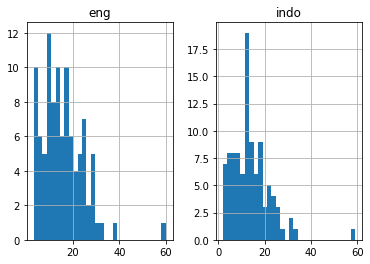

In [48]:
# empty lists
eng_l = []
indo_l = []

# populate the lists with sentence lengths
for i in eng_indo[:,0]:
      eng_l.append(len(i.split()))

for i in eng_indo[:,1]:
      indo_l.append(len(i.split()))

length_df = pd.DataFrame({'eng':eng_l, 'indo':indo_l})

length_df.hist(bins = 30)
plt.show()

In [49]:
# function to build a tokenizer
def tokenization(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [50]:
# prepare english tokenizer
eng_tokenizer = tokenization(eng_indo[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1

eng_length = 8
print('English Vocabulary Size: %d' % eng_vocab_size)

English Vocabulary Size: 590


In [51]:
prd=[]
def int_wrd(vt):
    for i in vt:
        stp=stop1(i)
        prd.append(stp)
    return(prd)
    
   

In [52]:
# prepare indonesian sentence tokenizer
indo_tokenizer = tokenization(eng_indo[:, 1])
indo_vocab_size = len(indo_tokenizer.word_index) + 1

indo_length = 8
print('Indonesian Vocabulary Size: %d' % indo_vocab_size)

Indonesian Vocabulary Size: 566


In [53]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
    # integer encode sequences
    seq = tokenizer.texts_to_sequences(lines)
    # pad sequences with 0 values
    seq = pad_sequences(seq, maxlen=length, padding='post')
    return seq

In [54]:
from sklearn.model_selection import train_test_split

# split data into train and test set
train, test = train_test_split(eng_indo, test_size=0.3, random_state = 12)


In [55]:
pred_text=int_wrd(test[:,0])

In [56]:
# prepare training data
trainX = encode_sequences(indo_tokenizer, indo_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])

# prepare validation data
testX = encode_sequences(indo_tokenizer, indo_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])


In [57]:
# build NMT model
def define_model(in_vocab,out_vocab, in_timesteps,out_timesteps,units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    model.add(LSTM(units))
    model.add(RepeatVector(out_timesteps))
    model.add(LSTM(units, return_sequences=True))
    model.add(Dense(out_vocab, activation='softmax'))
    return model

In [58]:
# model compilation
model = define_model(indo_vocab_size, eng_vocab_size, indo_length, eng_length, 512)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [59]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy')

In [60]:
filename = 'model.azhar'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=0, save_best_only=True, mode='min')

# train model
history = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1),
                    epochs=50, batch_size=512, validation_split = 0.2,callbacks=[checkpoint], 
                    verbose=0)

In [61]:
model = load_model('model.azhar')
preds = model.predict_classes(testX.reshape((testX.shape[0],testX.shape[1])))

In [67]:
preds[1]

array([12, 12,  0,  0,  0,  0,  0,  0], dtype=int64)

In [68]:
def get_word(n, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == n:
            return word
        else:
            return None

In [71]:
# getting the words back from the the vector representation.
pred_textt = []
for i in preds:
    print('i:',i)
    temp = []
    for j in range(len(i)):
        print("j",j)
        t = get_word(i[j], eng_tokenizer)
        print('i[j]',i[j])
        print('t',t)
        if j > 0:
            if (t == get_word(i[j-1], eng_tokenizer)) or (t == None):
                temp.append('')
            else:
                temp.append(t)
        else:
            if(t == None):
                temp.append('')
            else:
                temp.append(t) 

    pred_textt.append(' '.join(temp))
    


i: [0 0 0 0 0 0 0 0]
j 0
i[j] 0
t None
j 1
i[j] 0
t None
j 2
i[j] 0
t None
j 3
i[j] 0
t None
j 4
i[j] 0
t None
j 5
i[j] 0
t None
j 6
i[j] 0
t None
j 7
i[j] 0
t None
i: [12 12  0  0  0  0  0  0]
j 0
i[j] 12
t None
j 1
i[j] 12
t None
j 2
i[j] 0
t None
j 3
i[j] 0
t None
j 4
i[j] 0
t None
j 5
i[j] 0
t None
j 6
i[j] 0
t None
j 7
i[j] 0
t None
i: [12 12  0  0  0  0  0  0]
j 0
i[j] 12
t None
j 1
i[j] 12
t None
j 2
i[j] 0
t None
j 3
i[j] 0
t None
j 4
i[j] 0
t None
j 5
i[j] 0
t None
j 6
i[j] 0
t None
j 7
i[j] 0
t None
i: [ 5 12 12 12  5  0  0  0]
j 0
i[j] 5
t None
j 1
i[j] 12
t None
j 2
i[j] 12
t None
j 3
i[j] 12
t None
j 4
i[j] 5
t None
j 5
i[j] 0
t None
j 6
i[j] 0
t None
j 7
i[j] 0
t None
i: [ 5  7  7 12  0  0  0  0]
j 0
i[j] 5
t None
j 1
i[j] 7
t None
j 2
i[j] 7
t None
j 3
i[j] 12
t None
j 4
i[j] 0
t None
j 5
i[j] 0
t None
j 6
i[j] 0
t None
j 7
i[j] 0
t None
i: [ 5 12 12 12  5  0  0  0]
j 0
i[j] 5
t None
j 1
i[j] 12
t None
j 2
i[j] 12
t None
j 3
i[j] 12
t None
j 4
i[j] 5
t None
j 5
i[j] 0
t 

In [64]:
pred_df = pd.DataFrame({'indonesian':test[:,1], 'machine_translated_to_english' : pred_text})

In [65]:
pred_df.sample(10)

,indonesian,machine_translated_to_english
26,buku ini telah menjadi buku klasik selama bertahuntahun,book classic many years
20,kain hitam dengan embossing emas dan kertas yang bagus terlihat seperti kain katun,black clothbound gold embossing nice paper looks cotton rag
8,itu adalah kekacauan,messege
22,mungkin karena itu ditulis dalam bahasa inggris pada awalnya tulisan mengalir itu menyenangkan untuk dibaca dan gambar arang penulis menghiasi halaman adalah nilai tambah,probably becuase written english originally writing flows pleasant read charcoal drawings author decorating pages plus
13,buku itu memiliki kebangkitan seperti halnya sesuatu yang metafisik di tahun 60an yang bergejolak,book revival anything metaphysical turbulent 60s
3,gibran menawarkan wawasan dan cinta abadi dengan setiap kata,gibran offers timeless insights love word
9,jika anda mencari contoh buku bimbingan spiritual yang dirancang secara cerdas pun intended ini dia,looking example intelligently designed pun intended book spiritual guidance would
7,saya pikir kita sebagai bangsa harus membaca dan mempelajari pelajaran di sini,think nation read learn lessons
27,khotbah sufi,sufi sermon
23,anda tahu jika anda memiliki ide dan anda tidak menyadarinya maka itu bukan apaapa dan jika ide anda tidak berasal dari cinta dan sukacita maka mereka pahit dan apa yang mereka hasilkan akan menja...,see ideas realize nothing ideas come love joy bitter produce bitter flow love joy realization love joy thus work love made visible


In [21]:

# building a next_word prediction model using markov chain concept and ngrams.

two_grm=ngrams(all_tokens,2)
two_word_freq=FreqDist(two_grm)
word_freq= FreqDist(tokens)
# count the no of times the word present in corpus
def cnt_word(s):
    n=word_freq[s]
    return n
# counts the no. of time ngram present i.e group of word together present, here I have defined grp of 2 words.
def cnt_2words(s2):
    n2=two_word_freq[s2]
    return n2
def count_2word(w1,w2):
    #last_word=s1[-1]
    n3=cnt_2words((w1,w2))
    return n3
cc=0
st="UNKWN"
def prob(s3,cc=0,pt=''):
    s3=s3.split()
    last_word=s3[-1]
    cntt_word=cnt_word(last_word)
    for i in tokens:
        c2=count_2word(last_word,i)
        #print(c2)
        if c2>cc:
            cc=c2
            pt=st.replace(st,i)
      
    pb=cc/cntt_word
    print("next word probability:",pb)
    #print("next word :")
    return(pt)


In [23]:
# taking words input for next word prediction
inpt=input()
inpt=inpt.lower()
for i in range(7):
    ppp=prob(inpt)
    print(inpt)
    inpt=inpt+' '+ppp

rather simplistically 
next word probability: 1.0
rather simplistically 
next word probability: 0.02643171806167401
rather simplistically  written
next word probability: 0.018477574226152874
rather simplistically  written wa
next word probability: 0.05806451612903226
rather simplistically  written wa able
next word probability: 0.020121665886757137
rather simplistically  written wa able get
next word probability: 0.02531945101751065
rather simplistically  written wa able get one
next word probability: 0.03461538461538462
rather simplistically  written wa able get one best


In [ ]:
#########################################################################################################